In [8]:
import pandas as pd
import json
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("dialog_level_taaco_reformatted_v0.1.csv")
df.sample(1)

,Filename,text,token_length,TAACO_metrics
16794,dialog_17406.txt,"B:: Well, I think, if it's, the town is smalle...",29,"{'noun_ttr': 0.5555555555555556, 'verb_ttr': 1..."


In [10]:
keys = list(json.loads(df.TAACO_metrics[0].replace("\'", "\"")).keys())
metrics = {k: [] for k in keys}

for row in df.TAACO_metrics:
    row = row.replace("\'", "\"")
    row = json.loads(row)

    for k in row.keys():
        metrics[k].append(row[k])

In [11]:
means = {k: np.mean(metrics[k]) for k in keys}
stds = {k: np.std(metrics[k]) for k in keys}

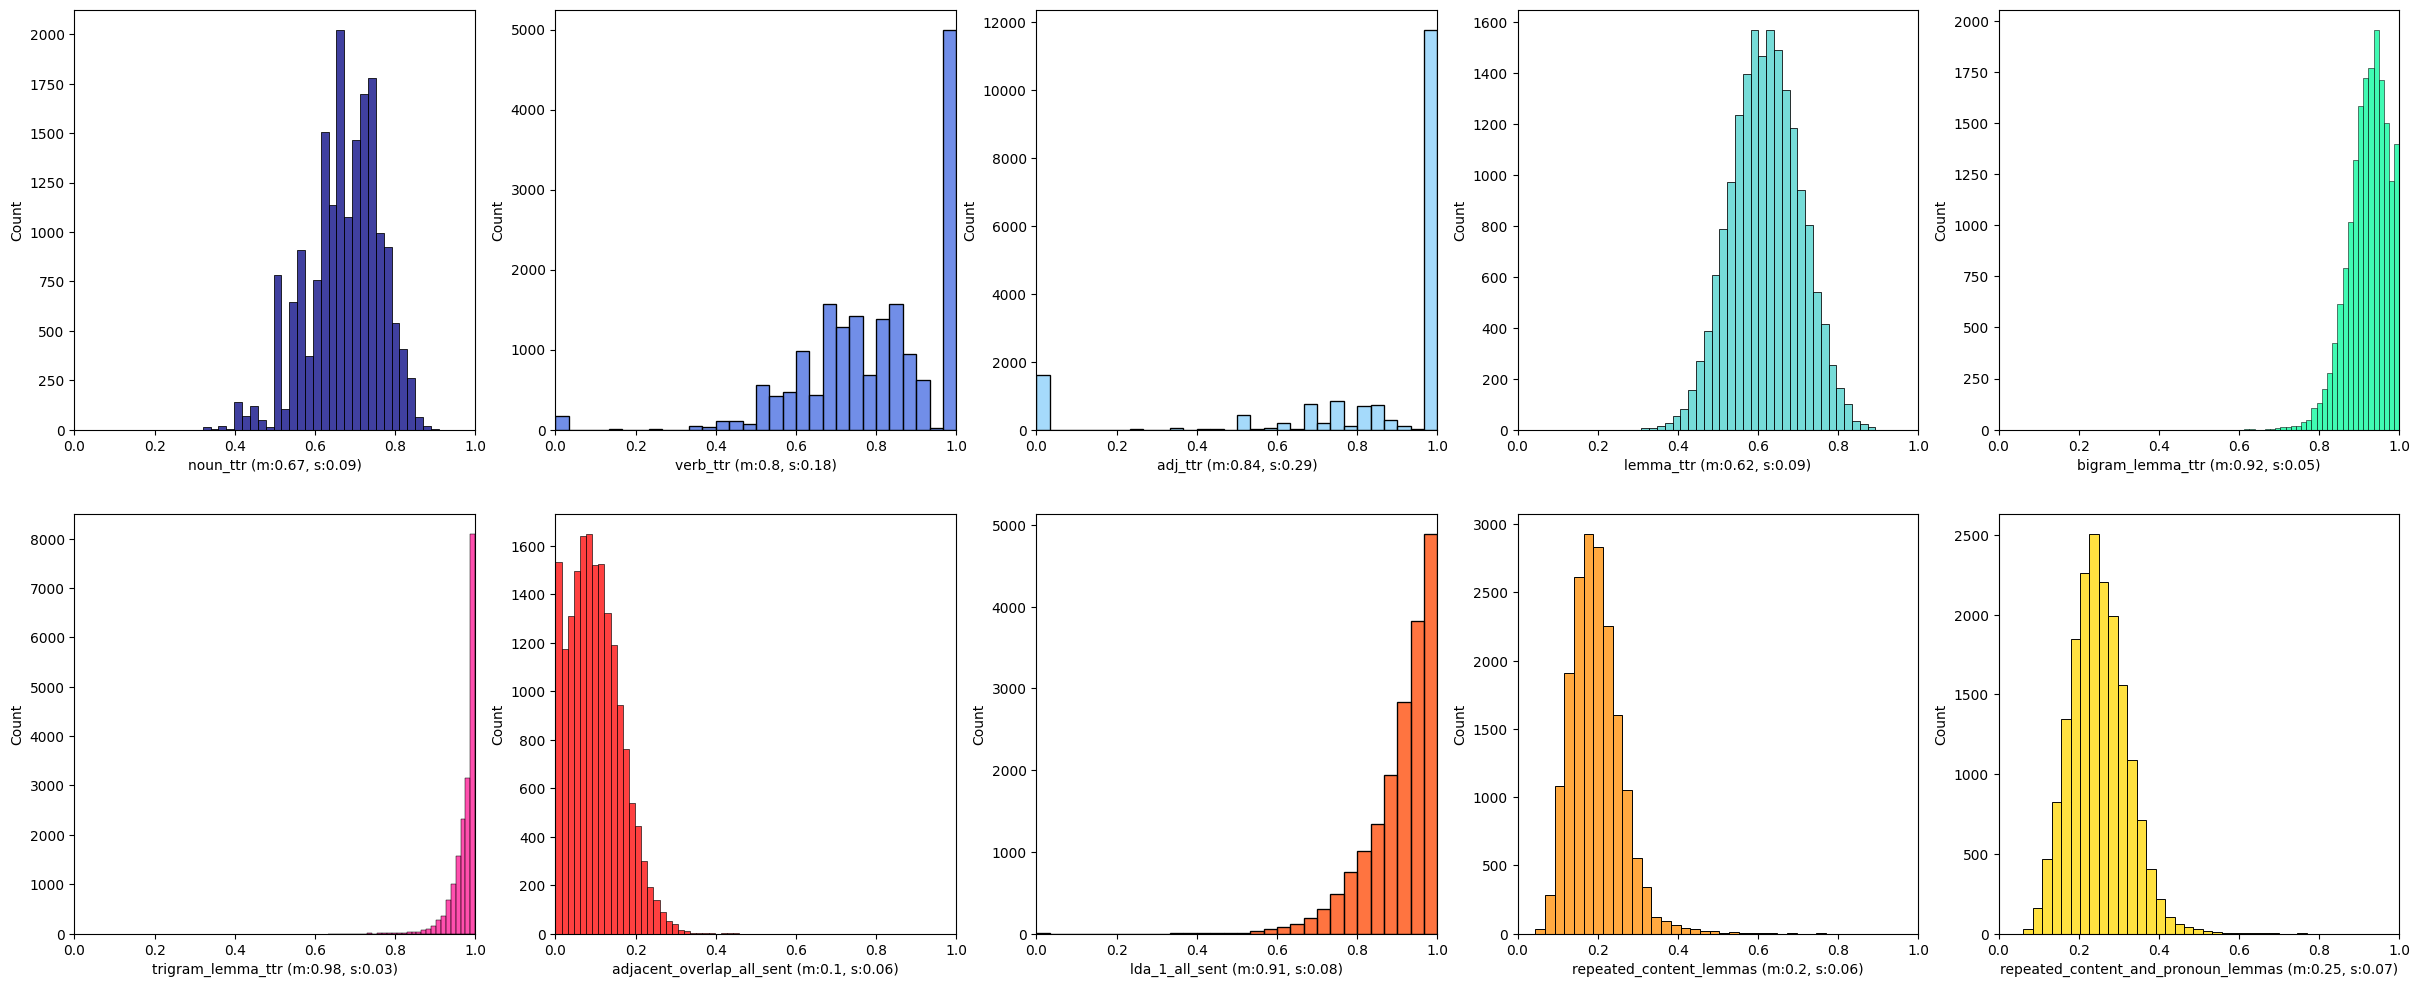

In [12]:
colors = ['navy', 'royalblue', 'lightskyblue', 'mediumturquoise', 'mediumspringgreen', 'deeppink', 'red', 'orangered', 'darkorange', 'gold']

fig, axes = plt.subplots(2, 5, figsize=(30, 12))
i = 0
j = 0
for ind in range(len(keys)):
    if ind == 5:
        i = 1

    axes[i, j].set_xlim(left=0, right=1)
    sns.histplot(metrics[keys[ind]], bins=30, ax=axes[i, j], color=colors[ind])
    m = np.round(means[keys[ind]],2)
    s = np.round(stds[keys[ind]],2)
    axes[i, j].set_xlabel(f'{keys[ind]} (m:{m}, s:{s})')
    j = (j+1)%5

plt.show()

In [14]:
normal_metrics = {k: [] for k in keys}

for key in keys:
    for i in range(len(metrics[key])):
        normal_metrics[key].append((metrics[key][i] - means[key]) / stds[key])

In [16]:
normal_means = {k: np.mean(normal_metrics[k]) for k in keys}
normal_stds = {k: np.std(normal_metrics[k]) for k in keys}

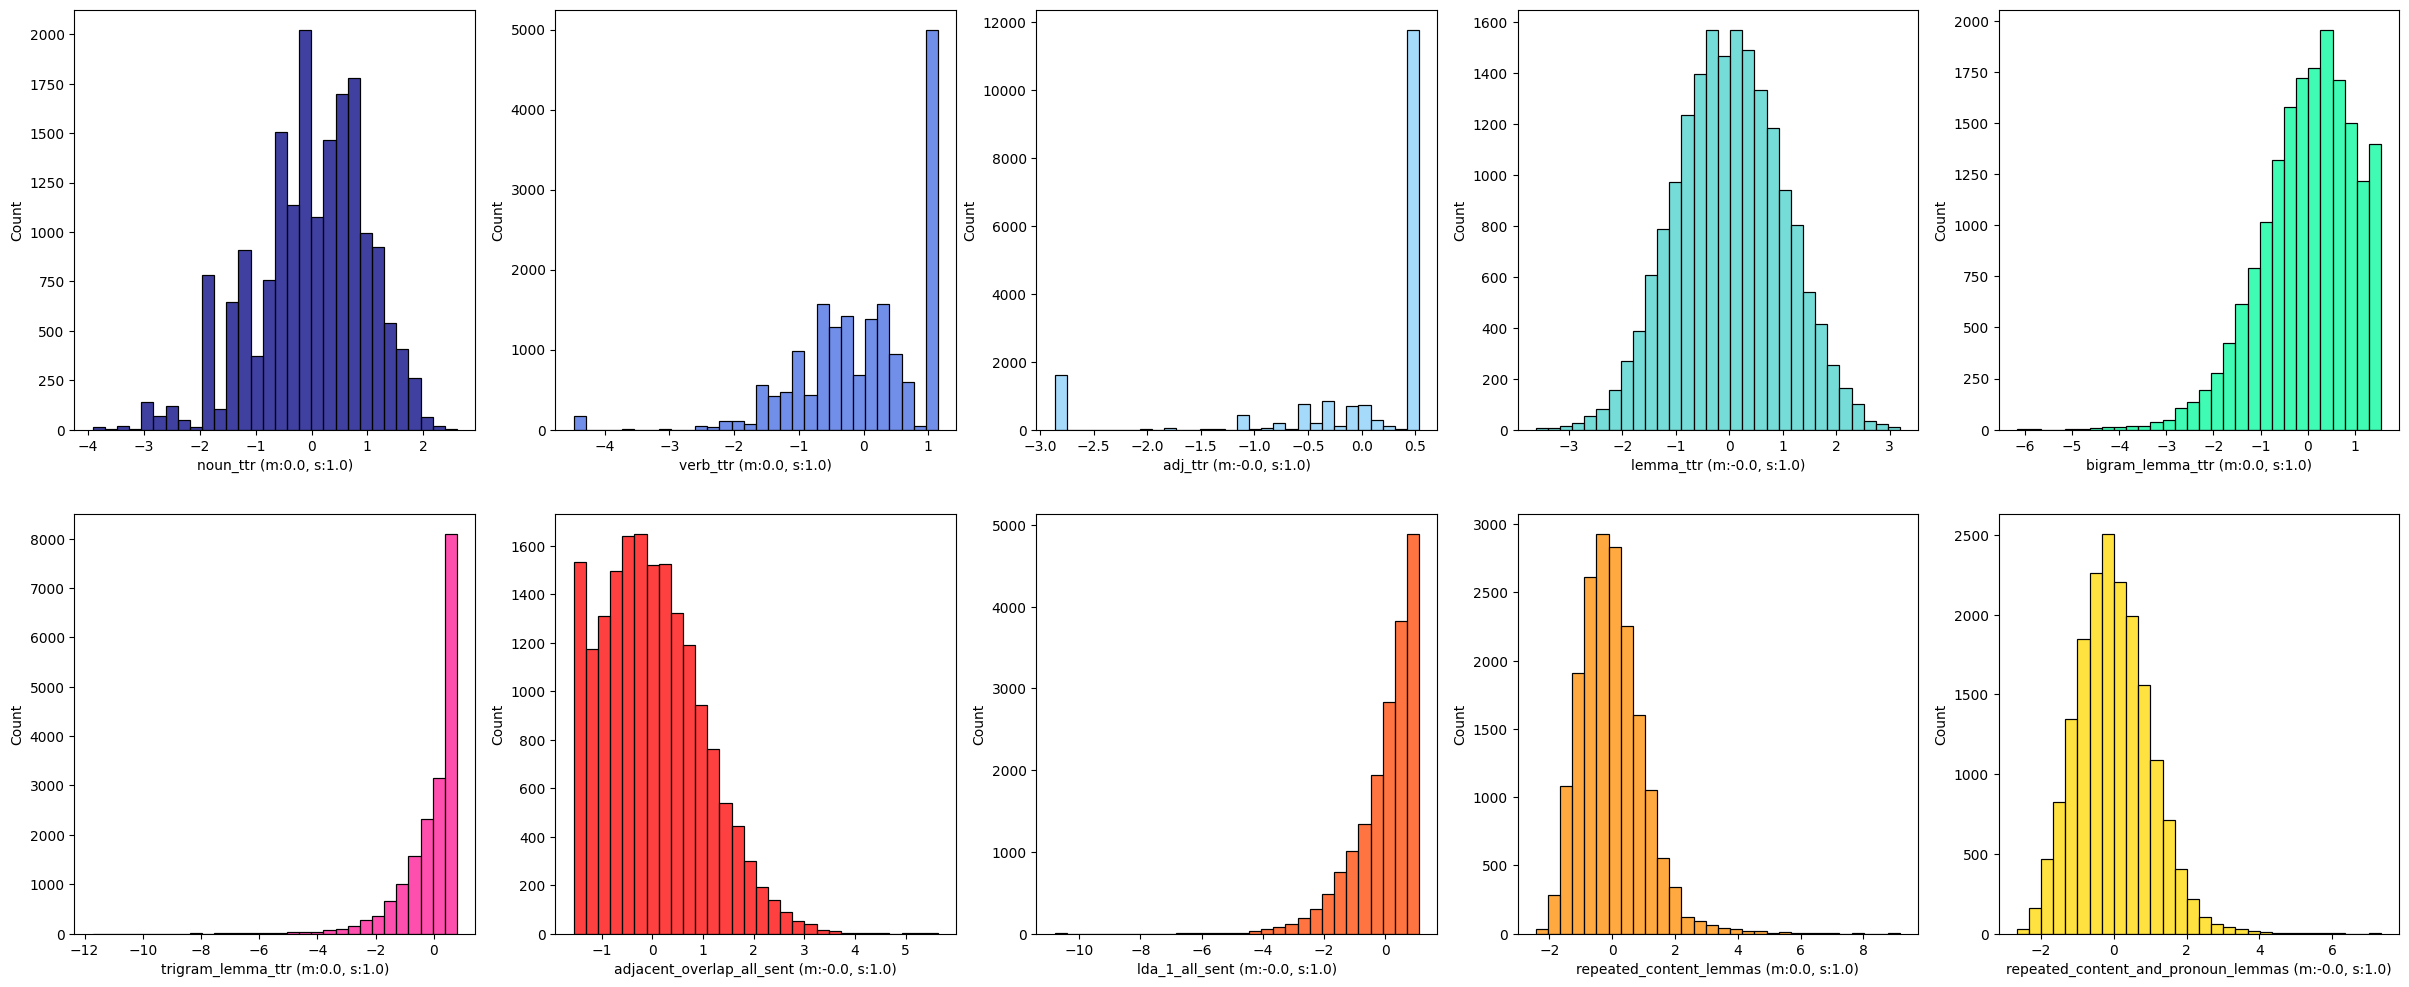

In [20]:
colors = ['navy', 'royalblue', 'lightskyblue', 'mediumturquoise', 'mediumspringgreen', 'deeppink', 'red', 'orangered', 'darkorange', 'gold']

fig, axes = plt.subplots(2, 5, figsize=(30, 12))
i = 0
j = 0
for ind in range(len(keys)):
    if ind == 5:
        i = 1

    # axes[i, j].set_xlim(, right=1)
    sns.histplot(normal_metrics[keys[ind]], ax=axes[i, j], color=colors[ind], bins=30)
    m = np.round(normal_means[keys[ind]],2)
    s = np.round(normal_stds[keys[ind]],2)
    axes[i, j].set_xlabel(f'{keys[ind]} (m:{m}, s:{s})')
    j = (j+1)%5

plt.show()